In [22]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Setup
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [24]:
df = pd.read_csv("/home/kepha/nairobi_property/data/clean_listings.csv")

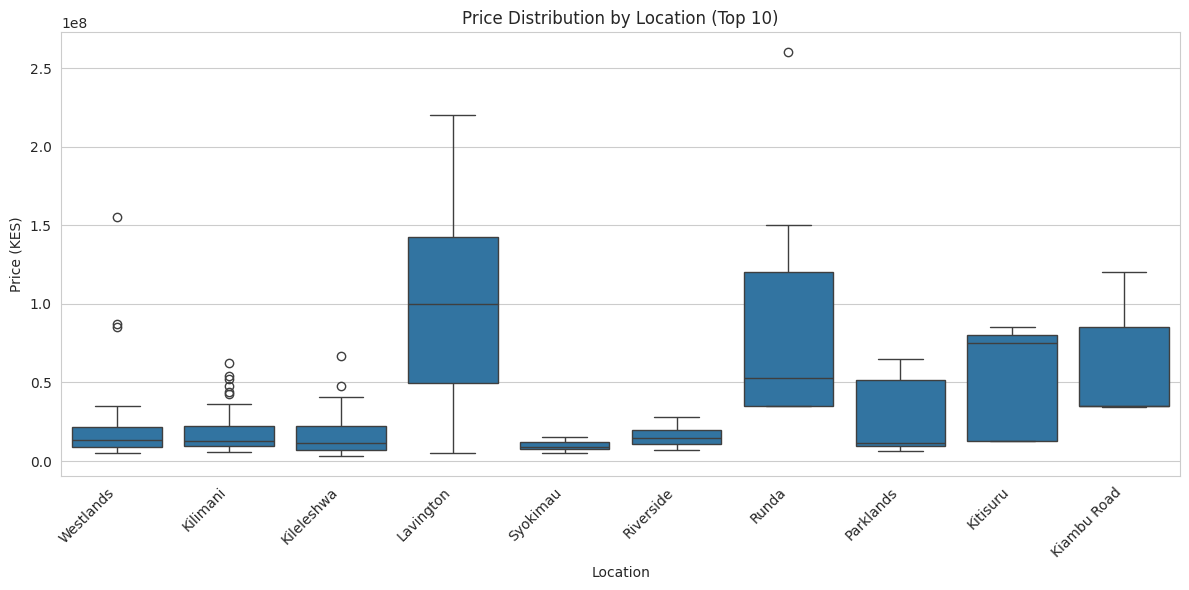

In [25]:
# Price distribution by location (top 10)
top_10_locations = df['location'].value_counts().head(10).index
df_top = df[df['location'].isin(top_10_locations)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='location', y='price_kes', order=top_10_locations)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Price (KES)')
plt.xlabel('Location')
plt.title('Price Distribution by Location (Top 10)')
plt.tight_layout()
plt.show()

In [26]:
# Median price by location
median_by_location = df.groupby('location')['price_kes'].median().sort_values(ascending=False)
print("\nTop 5 Most Expensive Locations (by median price):")
for i, (loc, price) in enumerate(median_by_location.head().items(), 1):
    print(f"{i}. {loc}: KSh {price:,.0f}")



Top 5 Most Expensive Locations (by median price):
1. Karen: KSh 210,000,000
2. Kyuna: KSh 123,000,000
3. Ridgeways: KSh 120,000,000
4. Loresho: KSh 110,000,000
5. Lavington: KSh 100,000,000


HOW STRONGLY DOES SIZE AFFECT PRICE?


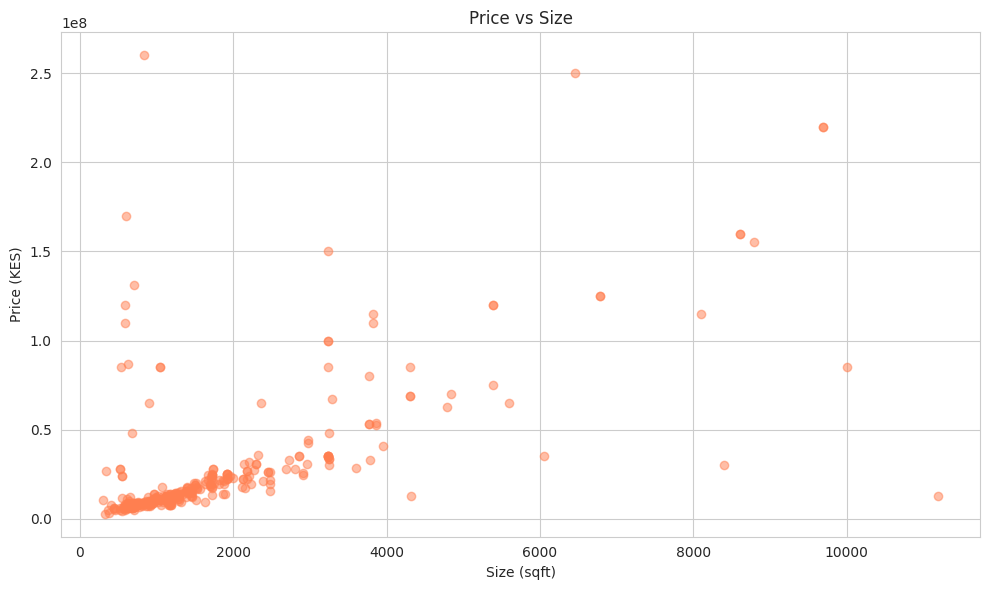

In [27]:

plt.figure(figsize=(10, 6))
plt.scatter(df['size_sqft'], df['price_kes'], alpha=0.5, color='coral')
plt.xlabel('Size (sqft)')
plt.ylabel('Price (KES)')
plt.title('Price vs Size')
plt.tight_layout()
plt.show()

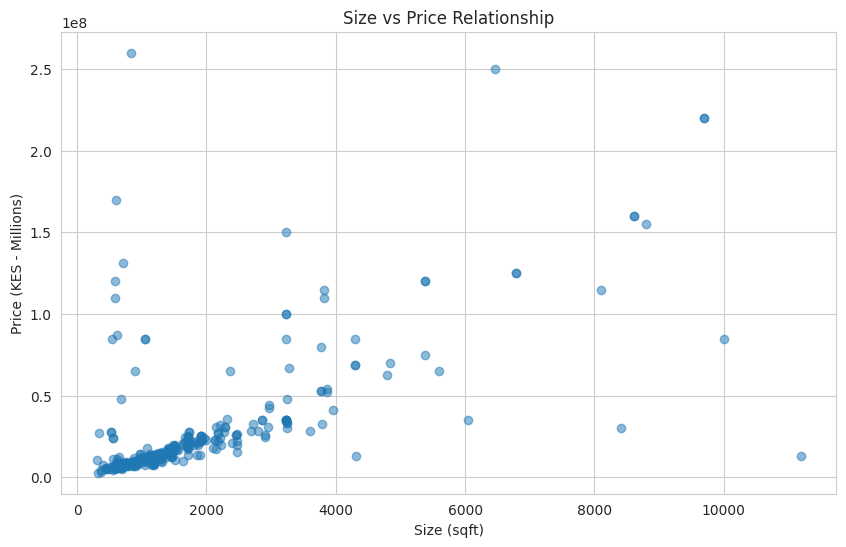

In [28]:
# 2. Size vs Price scatter
plt.figure(figsize=(10, 6))
plt.scatter(df['size_sqft'], df['price_kes'], alpha=0.5)
plt.xlabel('Size (sqft)')
plt.ylabel('Price (KES - Millions)')
plt.title('Size vs Price Relationship')
plt.show()

PRICE BY BEDROOMS

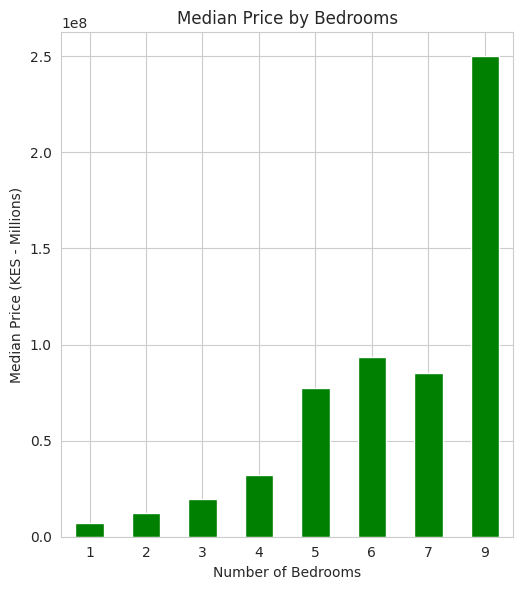

In [29]:
#Median price by bedrooms

plt.subplot(1, 2, 1)
df.groupby('bedrooms')['price_kes'].median().plot(kind='bar', color='green')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Median Price (KES - Millions)')
plt.title('Median Price by Bedrooms')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



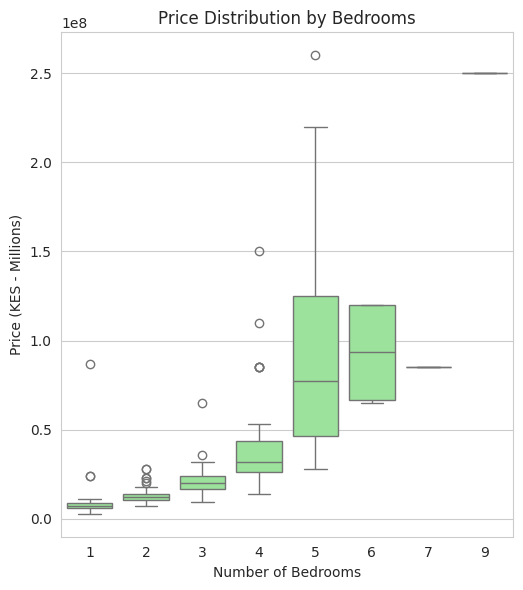

In [30]:

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='bedrooms', y='price_kes', color='lightgreen')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (KES - Millions)')
plt.title('Price Distribution by Bedrooms')

plt.tight_layout()
plt.show()

PRICE PER SQFT BY LOCATION

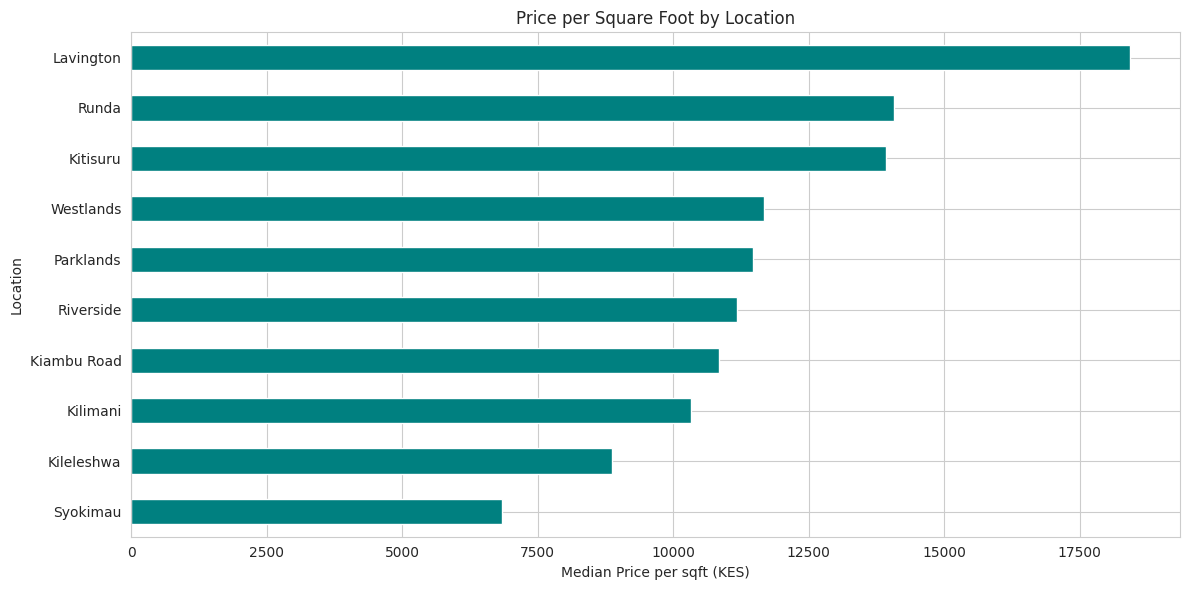

In [31]:
top_locs = df['location'].value_counts().head(10).index
df_top = df[df['location'].isin(top_locs)]

plt.figure(figsize=(12, 6))
price_per_sqft_by_loc = df_top.groupby('location')['price_per_sqft'].median().sort_values()
price_per_sqft_by_loc.plot(kind='barh', color='teal')
plt.xlabel('Median Price per sqft (KES)')
plt.ylabel('Location')
plt.title('Price per Square Foot by Location')
plt.tight_layout()
plt.show()
